In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


In [2]:

def show_image(pixels, label, color ="gray"):
    pixels = pixels.reshape((28,28))
    plt.imshow(pixels, cmap=color)
    plt.show()
    

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [3]:

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)


In [ ]:
print "X_train = %d \n y_train = %d"%(len(X_train), len(y_train))
print "X_test = %d \n y_test = %d"%(len(X_test), len(y_test))

In [8]:
X_train.shape

(60000, 784)

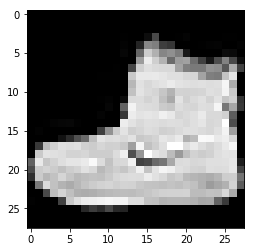

In [9]:
show_image(X_train[0], y_test[0])

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.10000000000000001

## Greatshearch ##
El siguiente link tiene un ejemplo de greatshearch para svc. Se definen distintos parametros y se printea cual de las combinaciones de ellos es la mas optima. Es un procesos costoso que habria que hacer algun dia D:

http://scikit-learn.org/0.18/auto_examples/model_selection/grid_search_digits.html

In [10]:
### Entrenamos la maquina SVM ###
from sklearn import svm

svc = svm.SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, y_train)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[844   1  19  19   6   2 102   0   7   0]
 [  2 981   5   8   3   0   1   0   0   0]
 [ 32   3 826  12  68   0  58   0   1   0]
 [ 42   8  23 865  26   0  30   0   6   0]
 [  3   1  99  40 804   0  48   0   5   0]
 [  1   0   0   1   0 965   0  16   2  15]
 [144   1  90  26  69   0 663   0   7   0]
 [  0   0   0   0   0  20   0 954   0  26]
 [  7   0   9   4   3   3  10   2 962   0]
 [  0   1   0   0   0  11   1  25   1 961]]


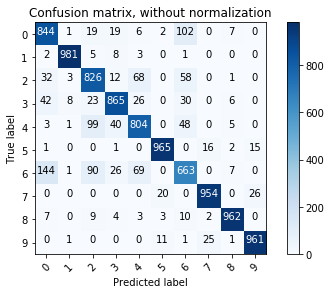

             precision    recall  f1-score   support

          0       0.79      0.84      0.81      1000
          1       0.98      0.98      0.98      1000
          2       0.77      0.83      0.80      1000
          3       0.89      0.86      0.88      1000
          4       0.82      0.80      0.81      1000
          5       0.96      0.96      0.96      1000
          6       0.73      0.66      0.69      1000
          7       0.96      0.95      0.96      1000
          8       0.97      0.96      0.97      1000
          9       0.96      0.96      0.96      1000

avg / total       0.88      0.88      0.88     10000



In [8]:
### Clasificamos SVM ###
y_predict = svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, y_predict))

In [4]:
### Entrenamos la maquina RandomForest ###
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix, without normalization
[[841   0  18  32   2   1  96   0  10   0]
 [  9 957   6  20   2   0   5   0   1   0]
 [ 13   0 799  14 103   0  68   0   3   0]
 [ 34   8  20 887  23   0  26   0   2   0]
 [  5   2 147  50 750   0  44   0   2   0]
 [  0   0   0   2   0 955   0  34   1   8]
 [187   1 137  30  93   0 534   0  18   0]
 [  0   0   0   0   0  27   0 924   0  49]
 [  1   2  12   4   4   3   7   6 961   0]
 [  1   0   1   0   0  14   0  44   1 939]]


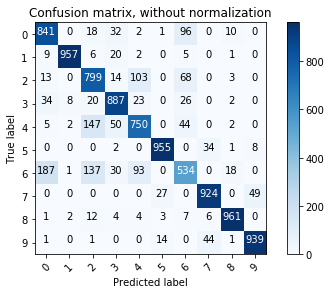

             precision    recall  f1-score   support

          0       0.77      0.84      0.80      1000
          1       0.99      0.96      0.97      1000
          2       0.70      0.80      0.75      1000
          3       0.85      0.89      0.87      1000
          4       0.77      0.75      0.76      1000
          5       0.95      0.95      0.95      1000
          6       0.68      0.53      0.60      1000
          7       0.92      0.92      0.92      1000
          8       0.96      0.96      0.96      1000
          9       0.94      0.94      0.94      1000

avg / total       0.85      0.85      0.85     10000



In [5]:
### Clasificamos RandomForest ###
predict = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [ ]:
# MEDIMOS PREDICCION DE SVC
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='macro')  
f1_score(y_test, y_predict, average='micro')  
f1_score(y_test, y_predict, average='weighted')  
f1_score(y_test, y_predict, average=None)

In [4]:
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
redNeuronal = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,250,500,1000))
#La cantidad de iteraciones = 1000
#Capas ocultas = [10,25,50,100]

In [46]:
comienzo = timer()
redNeuronal.fit(X_train, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal:",fin, " segundos")

Tiempo red neuronal: 1963.616588751342  segundos


In [47]:
indicador = redNeuronal.score(X_test, y_test)
if indicador > 0.5 and indicador < 1:
    print("Entrenado")
else:
    if indicador == 1.0:
        print("Sobreentrenado")
    else:
        print("Falta entrenamiento")
print (indicador)

Entrenado
0.8719


Confusion matrix, without normalization
[[852   1  17  16   3   2 102   0   7   0]
 [ 11 967   3  12   5   0   1   0   1   0]
 [ 25   0 735   9 115   0 115   0   1   0]
 [ 28  11   6 870  47   1  30   0   6   1]
 [  2   0  69  26 772   1 128   0   2   0]
 [  1   0   0   0   0 974   0  16   1   8]
 [159   3  70  15  52   0 697   0   4   0]
 [  0   0   0   0   0  23   0 962   0  15]
 [ 11   0   9   4   6   4   7   4 955   0]
 [  1   0   0   0   0  14   0  49   1 935]]


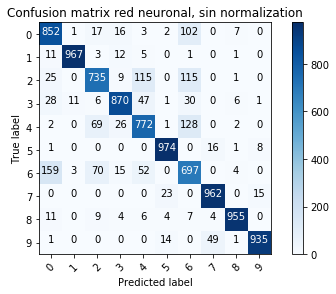

             precision    recall  f1-score   support

          0       0.78      0.85      0.82      1000
          1       0.98      0.97      0.98      1000
          2       0.81      0.73      0.77      1000
          3       0.91      0.87      0.89      1000
          4       0.77      0.77      0.77      1000
          5       0.96      0.97      0.96      1000
          6       0.65      0.70      0.67      1000
          7       0.93      0.96      0.95      1000
          8       0.98      0.95      0.97      1000
          9       0.97      0.94      0.95      1000

avg / total       0.87      0.87      0.87     10000



In [48]:
predict = redNeuronal.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix red neuronal, sin normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [5]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer, MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

In [6]:
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

C:\Users\fdman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def create_net(max_epochs):
    return NeuralNet(
        layers=[
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               (Conv2DLayer, {'num_filters': 7, 'filter_size': 4, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                #(Conv2DLayer, {'num_filters': 16, 'filter_size': 1, 'W': lasagne.init.GlorotUniform()}),
                #(MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
                #(DropoutLayer, {'p': 0.5}),
                #(DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),

        ],
        update=nesterov_momentum,
        update_learning_rate=0.03,
        update_momentum=0.9,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=512),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

(60000, 784)
(60000,)
(60000, 1, 28, 28)
(28, 28)


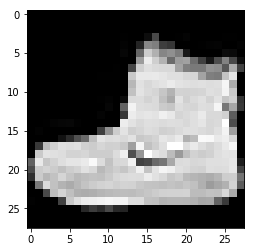

In [8]:

from sklearn.cross_validation import train_test_split


print (X_train.shape)
print (y_train.shape)
x = X_train.reshape(60000, 1, 28, 28)
print(x.shape)
print(x[0,0].shape)
show_image(x[0,0],'hola')

In [15]:
epoch = 10
net = create_net(epoch)
comienzo = timer()
net.fit(x, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal convulcionada:",fin, " segundos con epoch:",epoch)


# Neural Network with 14245 learnable parameters

## Layer information

  #  name        size
---  ----------  -------
  0  input0      1x28x28
  1  conv2d1     7x25x25
  2  maxpool2d2  7x12x12
  3  dense3      14

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1  2440.98854  1402.57605    1.74036      0.15858  10.26s
      2  1286.59236  1191.65546    1.07967      0.25242  12.19s
      3  1121.59236  1066.23482    1.05192      0.27508  10.48s
      4  1012.52595   969.34426    1.04455      0.28142  11.18s
      5   925.63231   891.96985    1.03774      0.30908  11.73s
      6   854.13203   825.84360    1.03425      0.32067  11.20s
      7   793.97960   772.28111    1.02810      0.37192  12.64s
      8   751.07422   738.93193    1.01643      0.39292  12.90s
      9   719.70024   709.00877    1.01508      0.39242  10.85s
     10   691.49827   682.39928    1.01333      0.40317  11.83s
Tiempo red neuronal 

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [11]:
X_test.shape
XTEST = X_test.reshape(10000,1,28,28)
XTEST.shape
print(y_test.shape)

(10000,)


In [12]:
print (classification_report(y_test, net.predict(XTEST)))


             precision    recall  f1-score   support

          0       0.02      0.01      0.01      1000
          1       0.12      0.19      0.15      1000
          2       0.24      0.28      0.26      1000
          3       0.19      0.30      0.23      1000
          4       0.00      0.00      0.00      1000
          5       0.03      0.02      0.02      1000
          6       0.13      0.52      0.21      1000
          7       0.00      0.00      0.00      1000
          8       0.00      0.00      0.00      1000
          9       0.23      0.17      0.19      1000

avg / total       0.10      0.15      0.11     10000



C:\Users\fdman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

<module 'matplotlib.pyplot' from 'C:\\Users\\fdman\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

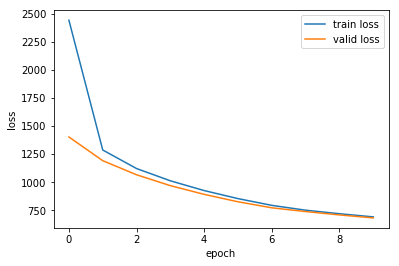

In [16]:
%matplotlib inline
visualize.plot_loss(net)